# Project 2 : Two dimentional Ising model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import pickle
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skms
import sklearn.linear_model as skl
import sklearn.metrics as skm
import tqdm
import copy
import time
from IPython.display import display

%matplotlib inline

sns.set(color_codes=True)

import algorithms
from classification import LogisticRegression

In [4]:
cwd = os.getcwd()
filenames = glob.glob(os.path.join(cwd, 'files*'))

In [5]:
label_filename = "/home/hanna/project2/files/Ising2DFM_reSample_L40_T=All_labels.pkl"

# Read in the labels
with open(label_filename, "rb") as f:
    labels = pickle.load(f)

dat_filename = "/home/hanna/project2/files/Ising2DFM_reSample_L40_T=All.pkl"
    
# Read in the corresponding configurations
with open(dat_filename, "rb") as f:
    data = np.unpackbits(pickle.load(f)).reshape(-1, 1600).astype("int")

# Set spin-down to -1
data[data == 0] = -1

In [6]:
data.shape

(160000, 1600)

In [7]:
# Set up slices of the dataset
ordered = slice(0, 70000)
critical = slice(70000, 100000)
disordered = slice(100000, 160000)

X = np.concatenate((data[ordered], data[disordered]))
Y = np.concatenate((labels[ordered], labels[disordered]))

In [8]:
labels[ordered].shape, labels[disordered].shape

((70000,), (60000,))

In [9]:
data[ordered].shape, data[disordered].shape

((70000, 1600), (60000, 1600))

In [10]:
Y.shape

(130000,)

In [11]:
data[disordered]

array([[ 1,  1, -1, ..., -1,  1,  1],
       [ 1,  1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       ..., 
       [ 1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1, -1, -1],
       [ 1,  1,  1, ...,  1, -1, -1]])

In [12]:
X.shape

(130000, 1600)

In [13]:
X_train, X_test, y_train, y_test = skms.train_test_split(X,Y, test_size = 0.333)

In [14]:
#from utils import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, split_size=0.3, random_state=0)

In [15]:
# Testing that y_test and train contain both label 
y_train, y_test

(array([0, 1, 0, ..., 0, 1, 1]), array([1, 1, 1, ..., 0, 0, 1]))

# Running different cases of Logistic Regression

# sjekker om koden funker, kjør for 50 når du går hjem

In [16]:
eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

results = []
epoch_costs = []

for e in eta:
    for l in lmd:
        a = LogisticRegression(eta = e,
                               random_state = 0, 
                               shuffle = True,
                               batch_size = 10, 
                               epochs=10, 
                               penalty = "l1",
                               lmd = l, 
                               key = "sigmoid")
                            
        log = a.fit(X_train, y_train, X_train, y_train)
        epoch_costs.append(log.epochCost)
        score = log.predict(X_test)
        acc = np.sum(score == y_test)/len(score)
        results.append(acc)
        print(" For eta %.4f  and lmd = %.4f the accuracy is %.3f " %(e, l, acc))
    print("----------------------------")

 For eta 0.0001  and lmd = 0.0001 the accuracy is 0.687 
 For eta 0.0001  and lmd = 0.0010 the accuracy is 0.686 
 For eta 0.0001  and lmd = 0.0100 the accuracy is 0.651 
 For eta 0.0001  and lmd = 0.1000 the accuracy is 0.536 
 For eta 0.0001  and lmd = 1.0000 the accuracy is 0.536 
 For eta 0.0001  and lmd = 10.0000 the accuracy is 0.536 
----------------------------
 For eta 0.0010  and lmd = 0.0001 the accuracy is 0.453 
 For eta 0.0010  and lmd = 0.0010 the accuracy is 0.453 
 For eta 0.0010  and lmd = 0.0100 the accuracy is 0.447 
 For eta 0.0010  and lmd = 0.1000 the accuracy is 0.393 
 For eta 0.0010  and lmd = 1.0000 the accuracy is 0.310 
 For eta 0.0010  and lmd = 10.0000 the accuracy is 0.370 
----------------------------
 For eta 0.0100  and lmd = 0.0001 the accuracy is 0.461 
 For eta 0.0100  and lmd = 0.0010 the accuracy is 0.705 
 For eta 0.0100  and lmd = 0.0100 the accuracy is 0.464 
 For eta 0.0100  and lmd = 0.1000 the accuracy is 0.456 
 For eta 0.0100  and lmd = 1

/home/hanna/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


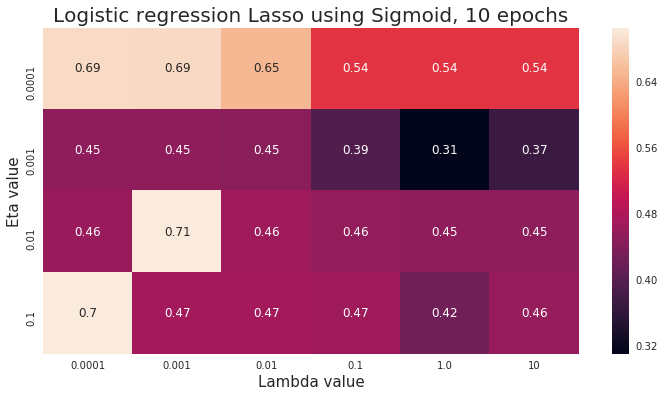

In [17]:
m = np.array(results).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Logistic regression Lasso using Sigmoid, 10 epochs", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15) #
plt.savefig("./results/figures/Logisticregression_Lasso_sigmoid_10.png")

In [18]:
np.shape(epoch_costs[0])

(10,)

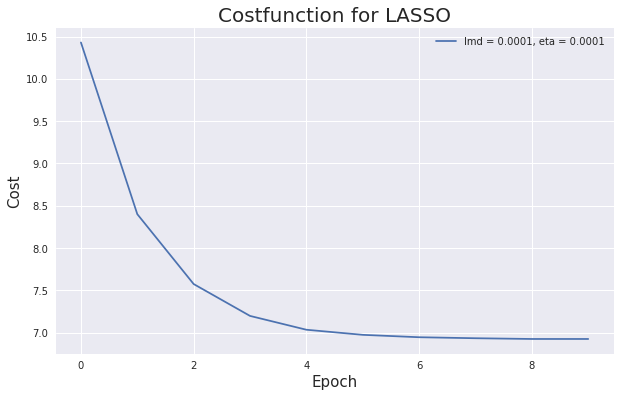

In [19]:

best_fit = epoch_costs[0]
epochs = np.arange(10)

plt.figure(figsize = (10,6))
plt.title("Costfunction for LASSO" ,fontsize = 20)

plt.plot(epochs, best_fit, label = "lmd = 0.0001, eta = 0.0001")
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Cost", fontsize = 15)
plt.legend()
plt.savefig("costfunc_lasso_sigmoid_epochs10.png")

# Plotting the most accuracte case pr epoch

In [20]:
results = []
epoch_costs = []

test_m = []
train_m = []

a = LogisticRegression(eta = 0.0001,
                       random_state = 0, 
                       shuffle = True,
                       batch_size = 10, 
                       epochs=50, 
                       penalty = "l1",
                       lmd = 0.0001, 
                       key = "sigmoid")

log = a.fit(X_train, y_train, X_test, y_test)
epoch_costs.append(log.epochCost)

train_m.append(log.eval_["train_preform"])
test_m.append(log.eval_["valid_preform"])

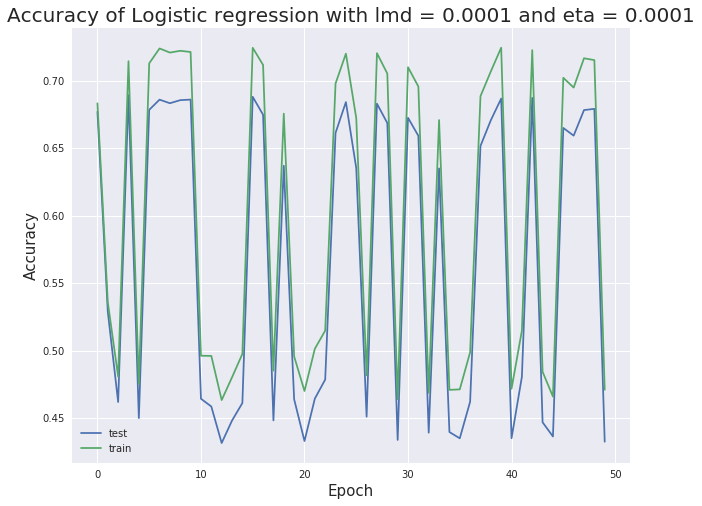

In [21]:
plt.figure(figsize = (10,8))
plt.title("Accuracy of Logistic regression with lmd = 0.0001 and eta = 0.0001", fontsize = 20)
plt.plot(np.arange(50), test_m[0], label = "test")
plt.plot(np.arange(50), train_m[0], label = "train")
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.savefig("./results/figures/logreg_accuracy_50epochs.png")

In [22]:
#train_m

# Various activation functions;  leaky relu and elu

In [23]:
eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

results = []
epoch_costs = []
# windows + l

for e in eta:
    for l in lmd:
        a = LogisticRegression(eta = e,
                               random_state = 0, 
                               shuffle = True,
                               batch_size = 10, 
                               epochs=50, 
                               penalty = "l1",
                               lmd = l, 
                               key = "LReLu",
                               alpha = 0.0001)
                            
        log = a.fit(X_train, y_train, X_train, y_train)
        epoch_costs.append(log.epochCost)
        score = log.predict(X_test)
        acc = np.sum(score == y_test)/len(score)
        print("lmd: " + str(l) + "  eta: " + str(e) + " accuracy  " + str(acc))
        results.append(acc)

/home/hanna/project2/classification.py:121: RuntimeWarning: invalid value encountered in log
  cost = -batchY.dot(np.log(output + 1e-8)) - ((1 - batchY).dot(np.log(1 - output + 1e-8) )) + cterm


lmd: 0.0001  eta: 0.0001 accuracy  0.535828135828
lmd: 0.001  eta: 0.0001 accuracy  0.535735735736
lmd: 0.01  eta: 0.0001 accuracy  0.535666435666
lmd: 0.1  eta: 0.0001 accuracy  0.535643335643
lmd: 1.0  eta: 0.0001 accuracy  0.535643335643
lmd: 10  eta: 0.0001 accuracy  0.535643335643


/home/hanna/project2/classification.py:128: RuntimeWarning: invalid value encountered in add
  net_input = np.dot(batchX, self.w_) + self.b_
/home/hanna/project2/classification.py:130: RuntimeWarning: invalid value encountered in greater_equal
  score = np.sum(np.where(test >= 0.5, 1, 0) == batchY)/len(output)
/home/hanna/project2/classification.py:165: RuntimeWarning: invalid value encountered in less_equal
  Z_out[np.where(Xw <= 0)] = self.alpha * Xw[np.where(Xw <= 0)]
/home/hanna/project2/classification.py:185: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(new >= 0.5, 1, 0)


lmd: 0.0001  eta: 0.001 accuracy  0.464356664357


/home/hanna/project2/classification.py:128: RuntimeWarning: overflow encountered in add
  net_input = np.dot(batchX, self.w_) + self.b_


lmd: 0.001  eta: 0.001 accuracy  0.464356664357


/home/hanna/project2/classification.py:105: RuntimeWarning: invalid value encountered in add
  net_input = np.dot(batchX, self.w_) + self.b_


lmd: 0.01  eta: 0.001 accuracy  0.464356664357
lmd: 0.1  eta: 0.001 accuracy  0.464356664357
lmd: 1.0  eta: 0.001 accuracy  0.464356664357
lmd: 10  eta: 0.001 accuracy  0.464356664357
lmd: 0.0001  eta: 0.01 accuracy  0.464356664357
lmd: 0.001  eta: 0.01 accuracy  0.464356664357
lmd: 0.01  eta: 0.01 accuracy  0.464356664357
lmd: 0.1  eta: 0.01 accuracy  0.464356664357
lmd: 1.0  eta: 0.01 accuracy  0.464356664357
lmd: 10  eta: 0.01 accuracy  0.464356664357
lmd: 0.0001  eta: 0.1 accuracy  0.464356664357
lmd: 0.001  eta: 0.1 accuracy  0.464356664357
lmd: 0.01  eta: 0.1 accuracy  0.464356664357
lmd: 0.1  eta: 0.1 accuracy  0.464356664357
lmd: 1.0  eta: 0.1 accuracy  0.464356664357
lmd: 10  eta: 0.1 accuracy  0.464356664357


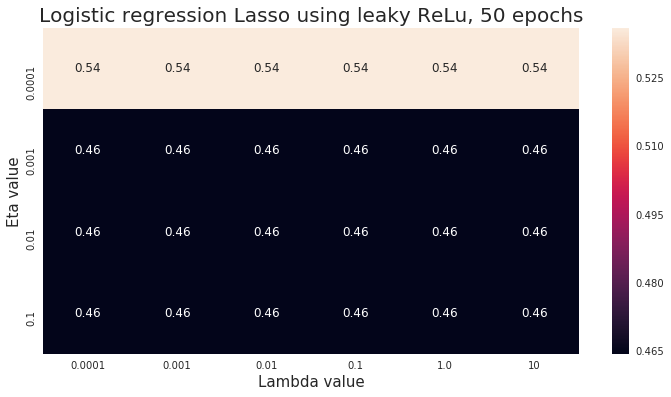

In [24]:
m = np.array(results).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Logistic regression Lasso using leaky ReLu, 50 epochs", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15) #
plt.savefig("./results/figures/Logisticregression_Lasso_LRELU_50.png")

In [25]:
eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

results = []
epoch_costs = []

for e in eta:
    for l in lmd:
        a = LogisticRegression(eta = e,
                               random_state = 0, 
                               shuffle = True,
                               batch_size = 10, 
                               epochs=50, 
                               penalty = "l1",
                               lmd = l, 
                               key = "elu", 
                               alpha = 0.0001)
                            
        log = a.fit(X_train, y_train, X_test, y_test)
        epoch_costs.append(log.epochCost)
        score = log.predict(X_test)
        acc = np.sum(score == y_test)/len(score)
        print("lmd: " + str(l) + "  eta: " + str(e) + " accuracy  " + str(acc))
        results.append(acc)

lmd: 0.0001  eta: 0.0001 accuracy  0.535828135828
lmd: 0.001  eta: 0.0001 accuracy  0.535735735736
lmd: 0.01  eta: 0.0001 accuracy  0.535666435666
lmd: 0.1  eta: 0.0001 accuracy  0.535643335643
lmd: 1.0  eta: 0.0001 accuracy  0.535643335643
lmd: 10  eta: 0.0001 accuracy  0.535643335643


/home/hanna/project2/classification.py:169: RuntimeWarning: invalid value encountered in less_equal
  Z_out[np.where(Xw <= 0)] = self.alpha *(np.exp( Xw[np.where(Xw <= 0)]) - 1)


lmd: 0.0001  eta: 0.001 accuracy  0.464356664357
lmd: 0.001  eta: 0.001 accuracy  0.464356664357
lmd: 0.01  eta: 0.001 accuracy  0.464356664357
lmd: 0.1  eta: 0.001 accuracy  0.464356664357
lmd: 1.0  eta: 0.001 accuracy  0.464356664357
lmd: 10  eta: 0.001 accuracy  0.464356664357
lmd: 0.0001  eta: 0.01 accuracy  0.464356664357
lmd: 0.001  eta: 0.01 accuracy  0.464356664357
lmd: 0.01  eta: 0.01 accuracy  0.464356664357
lmd: 0.1  eta: 0.01 accuracy  0.464356664357
lmd: 1.0  eta: 0.01 accuracy  0.464356664357
lmd: 10  eta: 0.01 accuracy  0.464356664357
lmd: 0.0001  eta: 0.1 accuracy  0.464356664357
lmd: 0.001  eta: 0.1 accuracy  0.464356664357
lmd: 0.01  eta: 0.1 accuracy  0.464356664357
lmd: 0.1  eta: 0.1 accuracy  0.464356664357
lmd: 1.0  eta: 0.1 accuracy  0.464356664357
lmd: 10  eta: 0.1 accuracy  0.464356664357


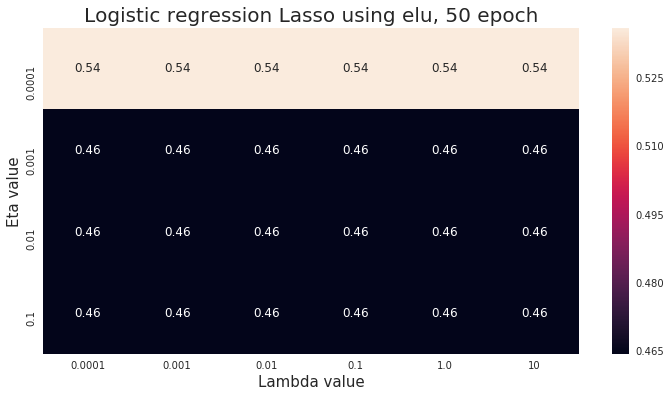

In [28]:
m = np.array(results).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Logistic regression Lasso using elu, 50 epoch", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15)
plt.savefig("./results/figures/Logisticregression_Lasso_ELU_50.png")

# Used for generated plots for the Appendix with  epochs = 1 and 10

In [30]:
eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

results = []
epoch_costs = []
# windows + l

for e in eta:
    for l in lmd:
        a = LogisticRegression(eta = e,
                               random_state = 0, 
                               shuffle = True,
                               batch_size = 10, 
                               epochs=1, 
                               penalty = "l1",
                               lmd = l, 
                               key = "sigmoid")
                            
        log = a.fit(X_train, y_train, X_test, y_test)
        epoch_costs.append(log.epochCost)
        score = log.predict(X_test)
        acc = np.sum(score == y_test)/len(score)
        print("lmd: " + str(l) + "  eta: " + str(e) + " accuracy  " + str(acc))
        results.append(acc)

lmd: 0.0001  eta: 0.0001 accuracy  0.524486024486
lmd: 0.001  eta: 0.0001 accuracy  0.667821667822
lmd: 0.01  eta: 0.0001 accuracy  0.673504273504
lmd: 0.1  eta: 0.0001 accuracy  0.476368676369
lmd: 1.0  eta: 0.0001 accuracy  0.535643335643
lmd: 10  eta: 0.0001 accuracy  0.535643335643
lmd: 0.0001  eta: 0.001 accuracy  0.464818664819
lmd: 0.001  eta: 0.001 accuracy  0.464218064218
lmd: 0.01  eta: 0.001 accuracy  0.459482559483
lmd: 0.1  eta: 0.001 accuracy  0.420212520213
lmd: 1.0  eta: 0.001 accuracy  0.334257334257
lmd: 10  eta: 0.001 accuracy  0.40097020097
lmd: 0.0001  eta: 0.01 accuracy  0.470893970894
lmd: 0.001  eta: 0.01 accuracy  0.471124971125
lmd: 0.01  eta: 0.01 accuracy  0.467567567568
lmd: 0.1  eta: 0.01 accuracy  0.461561561562
lmd: 1.0  eta: 0.01 accuracy  0.474797874798
lmd: 10  eta: 0.01 accuracy  0.465811965812
lmd: 0.0001  eta: 0.1 accuracy  0.464218064218
lmd: 0.001  eta: 0.1 accuracy  0.477015477015
lmd: 0.01  eta: 0.1 accuracy  0.47124047124
lmd: 0.1  eta: 0.1 ac

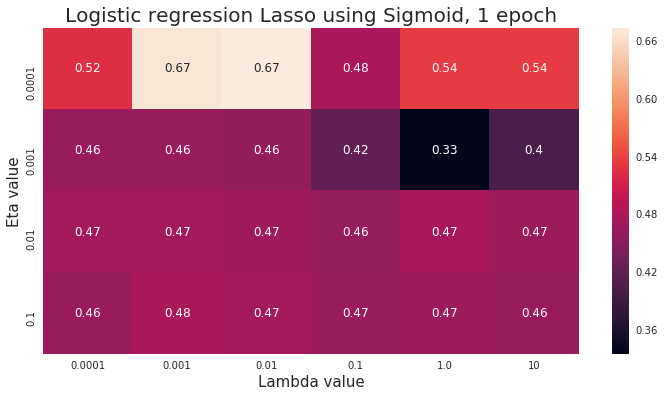

In [31]:
m = np.array(results).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Logistic regression Lasso using Sigmoid, 1 epoch", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15)
plt.savefig("./results/figures/Logisticregression_Lasso_sigmoid_1.png")

# Ridge regression, 50 epochs, sigmoid 

In [35]:
eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

results = []

for e in eta:
    for l in lmd:
        a = LogisticRegression(eta = e,
                               random_state = 0, 
                               shuffle = True,
                               batch_size = 10, 
                               epochs=50, 
                               penalty = "l2",
                               lmd = l, 
                               key = "sigmoid")
                            
        log = a.fit(X_train, y_train, X_test, y_test)
        score = log.predict(X_test)
        acc = np.sum(score == y_test)/len(score)
        print("lmd: " + str(l) + "  eta: " + str(e) + " accuracy  " + str(acc))
        results.append(acc)

lmd: 0.0001  eta: 0.0001 accuracy  0.432894432894
lmd: 0.001  eta: 0.0001 accuracy  0.432755832756
lmd: 0.01  eta: 0.0001 accuracy  0.430815430815
lmd: 0.1  eta: 0.0001 accuracy  0.417787017787
lmd: 1.0  eta: 0.0001 accuracy  0.368445368445
lmd: 10  eta: 0.0001 accuracy  0.285955185955
lmd: 0.0001  eta: 0.001 accuracy  0.466250866251
lmd: 0.001  eta: 0.001 accuracy  0.466158466158
lmd: 0.01  eta: 0.001 accuracy  0.465534765535
lmd: 0.1  eta: 0.001 accuracy  0.464726264726
lmd: 1.0  eta: 0.001 accuracy  0.450404250404
lmd: 10  eta: 0.001 accuracy  0.393046893047
lmd: 0.0001  eta: 0.01 accuracy  0.47823977824
lmd: 0.001  eta: 0.01 accuracy  0.470478170478
lmd: 0.01  eta: 0.01 accuracy  0.693208593209
lmd: 0.1  eta: 0.01 accuracy  0.509979209979
lmd: 1.0  eta: 0.01 accuracy  0.702356202356
lmd: 10  eta: 0.01 accuracy  0.439477939478
lmd: 0.0001  eta: 0.1 accuracy  0.48583968584
lmd: 0.001  eta: 0.1 accuracy  0.480734580735
lmd: 0.01  eta: 0.1 accuracy  0.474428274428
lmd: 0.1  eta: 0.1 ac

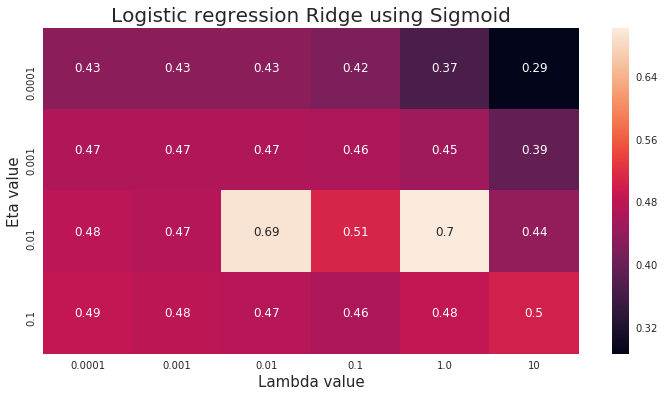

In [ ]:
m = np.array(results).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Logistic regression Ridge using Sigmoid", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15) #
plt.savefig("./results/figures/Logisticregression_Ridge_sigmoid_50.png")

# Comparing this to sci-kit learn

In [14]:
clf = skl.LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.6833448833448833

In [15]:
clf = skl.LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.68285978285978288